# Introduction to MMOT with Pairwise Costs

In [1]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 

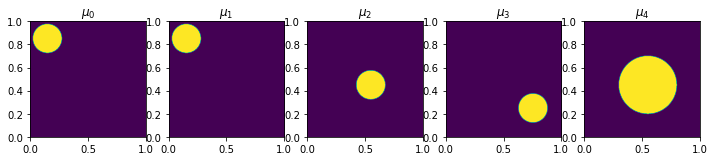

In [2]:
# Grid of size n1 x n2
n1 = 512   # x axis
n2 = 512   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

# positions = np.array([[0.25,0.75],
#                       [0.5, 0.75],
#                       [ 0.55,0.35],
#                       [0.65,0.25]])

positions = np.array([[0.15,0.85],
                      [ 0.15,0.85],
                      [0.55,0.45],
                      [0.75,0.25]])

# measures = [None]*len(positions)
measures = [None]*(len(positions) +1 )

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])

measures[4] = np.zeros((n2, n1))
measures[4][(x-positions[2][0])**2 + (y-positions[2][1])**2 < 4*r**2] = 1
measures[4] *= n1*n2 /np.sum(measures[4])


# Plot mu and nu
# fig, ax = plt.subplots(1, len(positions), figsize=(12,4))
# for i in range(len(positions)):
#   ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
#   ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

fig, ax = plt.subplots(1, len(measures), figsize=(12,4))
for i in range(len(measures)):
    ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1))
    ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i))

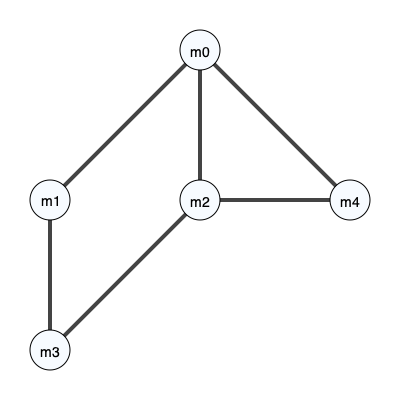

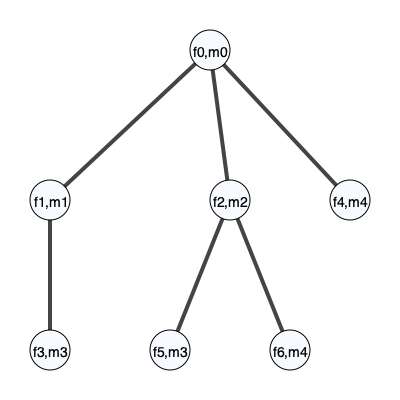

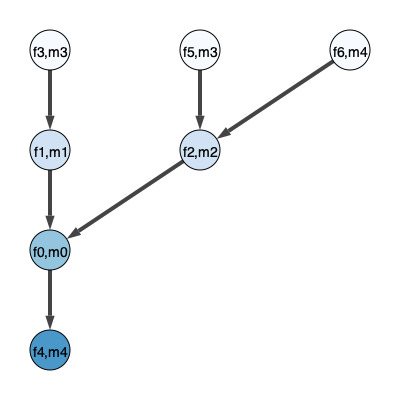

In [3]:
unroll_node = 0

# The set A that defines the pairwise costs
# edge_list = [[0,1],
#              [0,2],
#              [1,3],
#              [2,3]]
edge_list = [[0,1],
             [0,2],
             [1,3],
             [2,3],
             [0,4],
             [2,4]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

prob.Visualize('original', filename='CostGraph.svg')
prob.Visualize(filename='UndirectedTree.svg')
prob.Visualize(4,filename='DirectedTree.svg')

In [4]:
res = prob.Solve(max_its=200, step_size=1.0, ftol_abs=1e-10, gtol_abs=1e-5)

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  3.5737e-01,   3.2308e+00,         0
       10,   0.1344,  6.9302e-01,   4.0705e-01,         0
       20,   0.1040,  7.2609e-01,   2.1610e-02,         0
       30,   0.0201,  7.2775e-01,   6.4257e-04,         0
       40,   0.0623,  7.2779e-01,   3.8667e-05,         0
       50,   0.0121,  7.2780e-01,   1.6185e-05,         1
       60,   0.0006,  7.2780e-01,   1.6975e-05,         1
       60,   0.0006,  7.2780e-01,   1.6975e-05,         1
Terminating due to small change in objective.


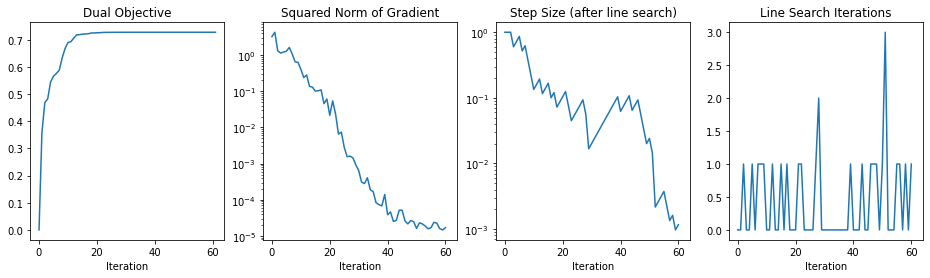

In [5]:

fig, axs = plt.subplots(ncols=4,sharex=True,figsize=(16,4))
axs[0].plot(res.costs)
axs[0].set_title('Dual Objective')
axs[0].set_xlabel('Iteration')

axs[1].semilogy(res.grad_sq_norms)
axs[1].set_title('Squared Norm of Gradient')
axs[1].set_xlabel('Iteration')

axs[2].semilogy(res.step_sizes)
axs[2].set_title('Step Size (after line search)')
axs[2].set_xlabel('Iteration')

axs[3].plot(res.line_its)
axs[3].set_title('Line Search Iterations')
axs[3].set_xlabel('Iteration')

plt.show()